In [40]:
import os
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [41]:
# Load .env enviroment variables
load_dotenv()

True

In [42]:
# Set keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [43]:
# Check class of key
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [44]:
# Set time range
start_date = pd.Timestamp('2021-08-12', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-09-15', tz='America/New_York').isoformat()

In [45]:
# Set Moderna ticker
MRNA_ticker = ["MRNA"]
               
# Set timeframe
timeframe = "1D"

In [46]:
#Fetch Moderna closing Prices
MRNA_closing_prices = alpaca.get_barset(
    MRNA_ticker,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 45
).df

# Create Moderna returns dataframe, remove close column, and drop nulls
MRNA = MRNA_closing_prices["MRNA"]["close"].to_frame()
MRNA['MRNA_returns'] = MRNA.close.pct_change()
MRNA.drop(columns=['close'], inplace=True)
MRNA.dropna(inplace=True)

In [47]:
# Create Moderna lagged returns column
MRNA["MRNA_lagged_returns"]=MRNA.MRNA_returns.shift()
MRNA.dropna(inplace=True)
MRNA.head()

,MRNA_returns,MRNA_lagged_returns
time,,
2021-08-16 00:00:00-04:00,-0.041184,-0.002926
2021-08-17 00:00:00-04:00,0.075067,-0.041184
2021-08-18 00:00:00-04:00,-0.007988,0.075067
2021-08-19 00:00:00-04:00,-0.058133,-0.007988
2021-08-20 00:00:00-04:00,0.019987,-0.058133


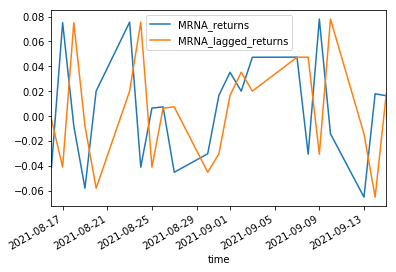

In [48]:
MRNA.plot()

In [49]:
# Set Astra Zeneca ticker
AZN_ticker = ["AZN"]

In [50]:
# Fetch Astra Zeneca closing prices
AZN_closing_prices = alpaca.get_barset(
    AZN_ticker,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 45
).df

# Create Astra Zeneca returns dataframe, remove close columnn, and drop nulls
AZN = AZN_closing_prices["AZN"]["close"].to_frame()
AZN['AZN_returns'] = AZN.close.pct_change()
AZN.drop(columns=['close'], inplace=True)
AZN.dropna(inplace=True)

In [51]:
# Create Astra Zeneca lagged returns column
AZN["AZN_lagged_returns"]=AZN.AZN_returns.shift()
AZN.dropna(inplace=True)
AZN.head()

,AZN_returns,AZN_lagged_returns
time,,
2021-08-16 00:00:00-04:00,0.004103,0.017745
2021-08-17 00:00:00-04:00,0.010385,0.004103
2021-08-18 00:00:00-04:00,0.001179,0.010385
2021-08-19 00:00:00-04:00,-0.003871,0.001179
2021-08-20 00:00:00-04:00,0.003548,-0.003871


In [52]:
# Set Pfizer ticker
PFE_ticker = ["PFE"]

In [53]:
# Fetch Pfizer closing prices
PFE_closing_prices = alpaca.get_barset(
    PFE_ticker,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 45
).df

# Create Pfizer returns dataframe, remove close column, and drop nulls
PFE = PFE_closing_prices["PFE"]["close"].to_frame()
PFE['PFE_returns'] = PFE.close.pct_change()
PFE.drop(columns=['close'], inplace=True)
PFE.dropna(inplace=True)

In [54]:
# Create Pfizer lagged returns column
PFE["PFE_lagged_returns"]=PFE.PFE_returns.shift()
PFE.dropna(inplace=True)
PFE.head()

,PFE_returns,PFE_lagged_returns
time,,
2021-08-16 00:00:00-04:00,0.008941,0.026387
2021-08-17 00:00:00-04:00,0.030662,0.008941
2021-08-18 00:00:00-04:00,-0.022015,0.030662
2021-08-19 00:00:00-04:00,-0.010343,-0.022015
2021-08-20 00:00:00-04:00,-0.001639,-0.010343


In [55]:
# Set J&J Ticker
JNJ_ticker = ["JNJ"]

In [56]:
# Fetch J&J closing prices
JNJ_closing_prices = alpaca.get_barset(
    JNJ_ticker,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 45
).df

# Create J&J returns data frame, remove close column, drop nulls
JNJ = JNJ_closing_prices["JNJ"]["close"].to_frame()
JNJ['JNJ_returns'] = JNJ.close.pct_change()
JNJ.drop(columns=['close'], inplace=True)
JNJ.dropna(inplace=True)

In [57]:
# Create JNJ lagged returns column
JNJ["JNJ_lagged_returns"]=JNJ.JNJ_returns.shift()
JNJ.dropna(inplace=True)
JNJ.head()

,JNJ_returns,JNJ_lagged_returns
time,,
2021-08-16 00:00:00-04:00,0.009306,0.005936
2021-08-17 00:00:00-04:00,0.009108,0.009306
2021-08-18 00:00:00-04:00,-0.012870,0.009108
2021-08-19 00:00:00-04:00,0.007845,-0.012870
2021-08-20 00:00:00-04:00,0.004816,0.007845


In [58]:
# Concatenate dataframes 

returns_df = pd.concat([MRNA, AZN, PFE, JNJ], axis='columns', join='inner')
returns_df.index = returns_df.index.date
returns_df.head()

,MRNA_returns,MRNA_lagged_returns,AZN_returns,AZN_lagged_returns,PFE_returns,PFE_lagged_returns,JNJ_returns,JNJ_lagged_returns
2021-08-16,-0.041184,-0.002926,0.004103,0.017745,0.008941,0.026387,0.009306,0.005936
2021-08-17,0.075067,-0.041184,0.010385,0.004103,0.030662,0.008941,0.009108,0.009306
2021-08-18,-0.007988,0.075067,0.001179,0.010385,-0.022015,0.030662,-0.012870,0.009108
2021-08-19,-0.058133,-0.007988,-0.003871,0.001179,-0.010343,-0.022015,0.007845,-0.012870
2021-08-20,0.019987,-0.058133,0.003548,-0.003871,-0.001639,-0.010343,0.004816,0.007845


In [72]:
# Convert to datetime index

returns_df.index = pd.to_datetime(returns_df.index)

In [73]:
# Create a train/test split for the data
train = returns_df.loc['2021-08-16':'2021-09-02']
test = returns_df.loc['2021-09-03': '2021-09-15']

In [74]:
# Create test and train sets for MRNA 
X_train_MRNA = train["MRNA_lagged_returns"].to_frame()
X_test_MRNA = test["MRNA_lagged_returns"].to_frame()
y_train_MRNA = train["MRNA_returns"].to_frame()
y_test_MRNA = test["MRNA_returns"].to_frame()

In [75]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model_MRNA = LinearRegression()
model_MRNA.fit(X_train_MRNA, y_train_MRNA)

LinearRegression()

In [81]:
# Make a prediction of "y" values using just the test dataset
predictions_MRNA = model.predict(X_test_MRNA)

In [82]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
results_MRNA = y_test_MRNA
results_MRNA["Predicted Return"] = predictions_MRNA

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1377ab8d0>,
      dtype=object)

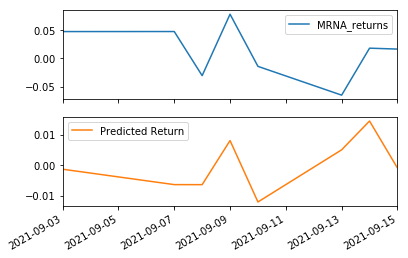

In [83]:
# Plot the first 5 predictions vs the true values
results_MRNA[:10].plot(subplots=True)

In [84]:
# Import MSE from sklearn
from sklearn.metrics import mean_squared_error

# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
mse_MRNA = mean_squared_error(
    results_MRNA["MRNA_returns"],
    results_MRNA["Predicted Return"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
out_of_sample_rmse_MRNA = np.sqrt(mse_MRNA)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse_MRNA}")

Out-of-Sample Root Mean Squared Error (RMSE): 0.044696801602859895


In [86]:
# Construct a dataframe using just the "y" training data:
in_sample_results_MRNA = y_train_MRNA

# Add a column of "in-sample" predictions to that dataframe:  
in_sample_results_MRNA["In-sample Predictions"] = model_MRNA.predict(X_train_MRNA)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse_MRNA = mean_squared_error(
    in_sample_results_MRNA["MRNA_returns"],
    in_sample_results_MRNA["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse_MRNA = np.sqrt(in_sample_mse_MRNA)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse_MRNA}")

In-sample Root Mean Squared Error (RMSE): 0.04025869307796913


In [87]:
# Create test and train sets for AZN 
X_train_AZN = train["AZN_lagged_returns"].to_frame()
X_test_AZN = test["AZN_lagged_returns"].to_frame()
y_train_AZN = train["AZN_returns"].to_frame()
y_test_AZN = test["AZN_returns"].to_frame()

In [88]:
# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model_AZN = LinearRegression()
model_AZN.fit(X_train_AZN, y_train_AZN)

LinearRegression()

In [89]:
# Make a prediction of "y" values using just the test dataset
predictions_AZN = model_AZN.predict(X_test_AZN)

In [90]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
results_AZN = y_test_AZN
results_AZN["Predicted Return"] = predictions_AZN

array([<matplotlib.axes._subplots.AxesSubplot object at 0x137909d90>,
      dtype=object)

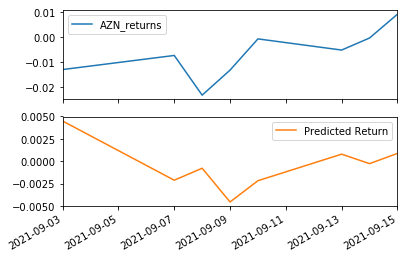

In [91]:
# Plot the first 5 predictions vs the true values
results_AZN[:10].plot(subplots=True)

In [92]:
# Import MSE from sklearn
from sklearn.metrics import mean_squared_error

# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
mse_AZN = mean_squared_error(
    results_AZN["AZN_returns"],
    results_AZN["Predicted Return"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):

out_of_sample_rmse_AZN = np.sqrt(mse_AZN)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse_AZN}")

Out-of-Sample Root Mean Squared Error (RMSE): 0.011240067424661325


In [93]:
# Construct a dataframe using just the "y" training data:
in_sample_results_AZN = y_train_AZN

# Add a column of "in-sample" predictions to that dataframe:  
in_sample_results_AZN["In-sample Predictions"] = model_AZN.predict(X_train_AZN)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse_AZN = mean_squared_error(
    in_sample_results_AZN["AZN_returns"],
    in_sample_results_AZN["In-sample Predictions"]
)


# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse_AZN = np.sqrt(in_sample_mse_AZN)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse_AZN}")

In-sample Root Mean Squared Error (RMSE): 0.0062048681766547886


In [94]:
# Create test and train sets for AZN 
X_train_PFE = train["PFE_lagged_returns"].to_frame()
X_test_PFE = test["PFE_lagged_returns"].to_frame()
y_train_PFE = train["PFE_returns"].to_frame()
y_test_PFE = test["PFE_returns"].to_frame()

In [95]:
# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model_PFE = LinearRegression()
model_PFE.fit(X_train_PFE, y_train_PFE)

LinearRegression()

In [96]:
# Make a prediction of "y" values using just the test dataset
predictions_PFE = model_PFE.predict(X_test_PFE)

In [97]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
results_PFE = y_test_PFE
results_PFE["Predicted Return"] = predictions_PFE

array([<matplotlib.axes._subplots.AxesSubplot object at 0x137ac0510>,
      dtype=object)

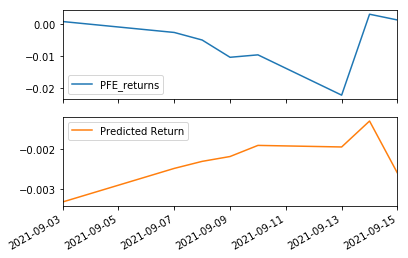

In [98]:
# Plot the first 5 predictions vs the true values
results_PFE[:10].plot(subplots=True)

In [99]:
# Import MSE from sklearn
from sklearn.metrics import mean_squared_error

# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
mse_PFE = mean_squared_error(
    results_PFE["PFE_returns"],
    results_PFE["Predicted Return"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):

out_of_sample_rmse_PFE = np.sqrt(mse_PFE)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse_PFE}")

Out-of-Sample Root Mean Squared Error (RMSE): 0.008609981302864425


In [100]:
# Construct a dataframe using just the "y" training data:
in_sample_results_PFE = y_train_PFE

# Add a column of "in-sample" predictions to that dataframe:  
in_sample_results_PFE["In-sample Predictions"] = model_PFE.predict(X_train_PFE)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse_PFE = mean_squared_error(
    in_sample_results_PFE["PFE_returns"],
    in_sample_results_PFE["In-sample Predictions"]
)


# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse_PFE = np.sqrt(in_sample_mse_PFE)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse_PFE}")

In-sample Root Mean Squared Error (RMSE): 0.01740803179584292


In [101]:
# Create test and train sets for JNJ 
X_train_JNJ = train["JNJ_lagged_returns"].to_frame()
X_test_JNJ = test["JNJ_lagged_returns"].to_frame()
y_train_JNJ = train["JNJ_returns"].to_frame()
y_test_JNJ = test["JNJ_returns"].to_frame()

In [102]:
# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model_JNJ = LinearRegression()
model_JNJ.fit(X_train_PFE, y_train_JNJ)

LinearRegression()

In [103]:
# Make a prediction of "y" values using just the test dataset
predictions_JNJ = model_JNJ.predict(X_test_JNJ)

In [104]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
results_JNJ = y_test_JNJ
results_JNJ["Predicted Return"] = predictions_JNJ

array([<matplotlib.axes._subplots.AxesSubplot object at 0x137c32d50>,
      dtype=object)

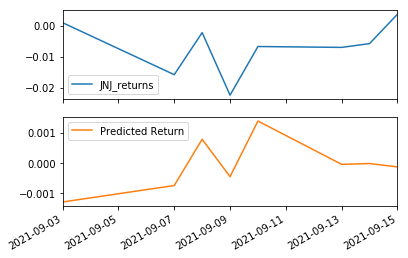

In [105]:
# Plot the first 5 predictions vs the true values
results_JNJ[:10].plot(subplots=True)

In [110]:
# Import MSE from sklearn
from sklearn.metrics import mean_squared_error

# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
mse_JNJ = mean_squared_error(
    results_JNJ["JNJ_returns"],
    results_JNJ["Predicted Return"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
out_of_sample_rmse_JNJ = np.sqrt(mse_JNJ)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse_JNJ}")

Out-of-Sample Root Mean Squared Error (RMSE): 0.010492745804604468


In [111]:
# Construct a dataframe using just the "y" training data:
in_sample_results_JNJ = y_train_JNJ

# Add a column of "in-sample" predictions to that dataframe:  
in_sample_results_JNJ["In-sample Predictions"] = model_JNJ.predict(X_train_JNJ)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse_JNJ = mean_squared_error(
    in_sample_results_JNJ["JNJ_returns"],
    in_sample_results_JNJ["In-sample Predictions"]
)


# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse_JNJ = np.sqrt(in_sample_mse_JNJ)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse_JNJ}")

In-sample Root Mean Squared Error (RMSE): 0.007912528863650023
